### Statistics Class: Lab 2 Solutions  

In [1]:
#Import Needed Libraries for the lab
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline  

**Business Question:** When cooling begins, is it usually hotter in the space heated by VAVCO 3-06 than the space heated by VAVCO 4-06?

Compare temperatures using:
- Two-sample t-test
- Paired t-test

In [2]:
#Load and check the data
df = pd.read_excel('../Datasets/VAV 3-06 4-06 1stHalf_stacked.xlsx')
df.head()

,Start.time,VAV Unit,RmTemp
0,2017-03-15 07:01:00,VAVCO 3-06,73.5
1,2017-04-03 07:00:00,VAVCO 3-06,74.0
2,2017-04-04 07:04:00,VAVCO 3-06,73.0
3,2017-04-05 07:01:00,VAVCO 3-06,73.0
4,2017-04-06 07:08:00,VAVCO 3-06,73.0


In [3]:
# check data types and quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
Start.time    58 non-null datetime64[ns]
VAV Unit      58 non-null object
RmTemp        58 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ KB


#### Two-sample t-test
Here, we'll treat the temperature measurements in each room as independent samples and use a two-sample t-test of means to estimate if the temperatures are the same. Our null and alternate hypotheses are:
$$ 
H_0:\mu_1=\mu_2 \\
H_a: \mu_1 \ne \mu_2
$$

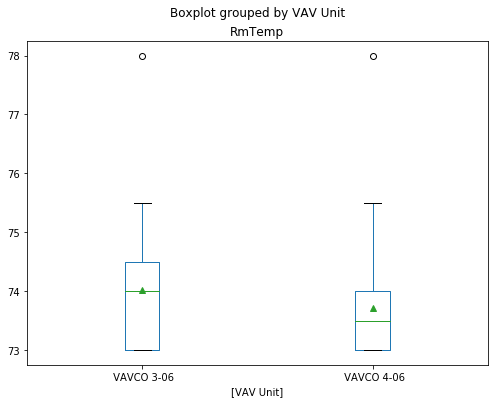

In [4]:
#Compare histograms/boxplots
df.boxplot(
    by=['VAV Unit'],
    grid=False,
    showmeans=True,
    figsize=(8,6)
)
plt.show()

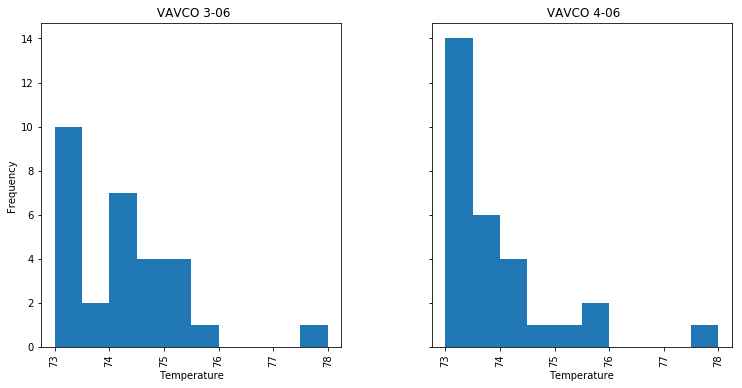

In [5]:
# plot histogram
ax = df.hist(
    by=['VAV Unit'],
    sharey=True,
    sharex=True,
    figsize=(12,6)
)

ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Temperature')

plt.show()

In [6]:
#Perform the statistical test
result = stats.ttest_ind(
    df.loc[df['VAV Unit']==' VAVCO 3-06', 'RmTemp'],
    df.loc[df['VAV Unit']==' VAVCO 4-06', 'RmTemp']
)
print(result)

Ttest_indResult(statistic=1.068506677098121, pvalue=0.28987644367805765)


**Interpretation:** Since $p>.05$, we fail to reject the null hypothesis. Based on this test there isn't enough information to determine if the rooms start the day at different temperatures.

In [7]:
#Find a confidence intervale for the differences
difference = df.loc[df['VAV Unit']==' VAVCO 3-06', 'RmTemp'].values - df.loc[df['VAV Unit']==' VAVCO 4-06', 'RmTemp'].values

mean,var,stdev = stats.bayes_mvs(difference, alpha=.95)
mean

Mean(statistic=0.3103448275862069, minmax=(0.12417938352413493, 0.4965102716482789))

#### Approach 2: Paired t-test

This time, we'll treat the temperature difference between the rooms on each day as the test variable. Now, our null and alternate hypotheses are:
$$
H_0: \bar{\delta}=0 \\
H_a: \bar{\delta} \ne 0
$$
where
$$ \delta_i=X_i^{(\text{4-06})} - X_i^{(\text{3-06})} $$
Here,$X_i^{(j)}$ is the temperature in room $j$ on the day $i$.

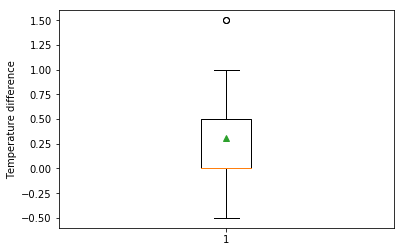

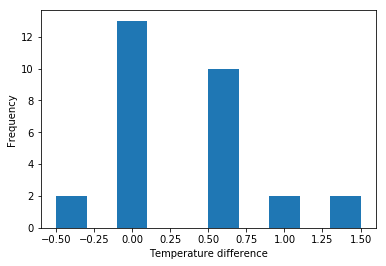

In [8]:
#Compare histograms/boxplots

plt.boxplot(difference, showmeans=True)
plt.ylabel("Temperature difference")
plt.show()

plt.hist(difference)
plt.ylabel("Frequency")
plt.xlabel("Temperature difference")
plt.show()

In [9]:
#Perform the statistical test
result = stats.ttest_1samp(
    difference,
    0
)
print(result)

Ttest_1sampResult(statistic=3.4147720832381663, pvalue=0.0019661248830680567)


**Interpretation:** Since $p<.05$, we again reject the null hypothesis. Note that the effect is much stronger with the paired test than the two-sample test ($|T|=6.48$ instead of $|T|=2.74$). In some cases, a two-sample test could result in an *Type 2* error that would have been avoided with a paired t-test.